In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, f1_score

In [2]:
from DataPreprocessing import DataPreprocessor

Number of images: 8819
Labels: {'SidePlank': 0, 'UpperCrunches': 1, 'Wrong stationary lunges': 2, 'WrongSidePlank': 3, 'WrongUpperCrunches': 4, 'stationary lunges': 5}


In [3]:
# Example usage
data_dir = "exercise_data"
preprocessor = DataPreprocessor(data_dir)
X, y, exercise_labels = preprocessor.preprocess_data()

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Reshape X to have the correct shape for Conv2D
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [6]:
NUM_CLASSES = 6

Model Building

In [7]:
# Build a more complex CNN model using functional API
inputs = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2], 1))
x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

# Compile the model with a learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[lr_schedule, early_stopping])

Epoch 1/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.8115 - loss: 0.6930 - val_accuracy: 0.1570 - val_loss: 8.5987 - learning_rate: 0.0010
Epoch 2/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9354 - loss: 0.2168 - val_accuracy: 0.3588 - val_loss: 4.7944 - learning_rate: 0.0010
Epoch 3/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9525 - loss: 0.1351 - val_accuracy: 0.7817 - val_loss: 0.6631 - learning_rate: 0.0010
Epoch 4/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9464 - loss: 0.1685 - val_accuracy: 0.9144 - val_loss: 0.2245 - learning_rate: 0.0010
Epoch 5/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9757 - loss: 0.0761 - val_accuracy: 0.9473 - val_loss: 0.1772 - learning_rate: 0.0010
Epoch 6/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.9747 - loss: 0.0760 - val_accuracy: 0.9836 - val_loss: 0.0528 - learning_rate: 0.0010
Epoch 7/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9786 - loss: 0

In [21]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 33, 2, 1)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 33, 2, 64)           │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 33, 2, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 17, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 1, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 17, 1, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 9, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 1, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 9, 1, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 5, 1, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 5, 1, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,027,220 (26.81 MB)

 Trainable params: 2,341,766 (8.93 MB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 4,683,534 (17.87 MB)

In [22]:
# Evaluate the model on training and test data
exercise_Labels = {'true Jumping Jacks': 0, 'true Side Plank': 1, 'true UpperCrunches': 2, 'Wrong Jumping Jacks': 3, 'Wrong Side plank': 4, 'Wrong Upper Crunches': 5}

# Make predictions on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, np.argmax(y_train_pred, axis=1))
test_accuracy = accuracy_score(y_test, np.argmax(y_test_pred, axis=1))
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Training Accuracy: 1.0
Testing Accuracy: 0.9971655328798186


In [23]:
# Compute precision, recall, and F1-score for testing data
precision_test = precision_score(y_test, np.argmax(y_test_pred, axis=1), average='weighted')
recall_test = recall_score(y_test, np.argmax(y_test_pred, axis=1), average='weighted')
f1_test = f1_score(y_test, np.argmax(y_test_pred, axis=1), average='weighted')
print("Precision (Testing):", precision_test)
print("Recall (Testing):", recall_test)
print("F1-score (Testing):", f1_test)

Precision (Testing): 0.9971754598955157
Recall (Testing): 0.9971655328798186
F1-score (Testing): 0.9971638601734432


In [24]:
# Compute precision, recall, and F1-score for training data
precision_train = precision_score(y_train, np.argmax(y_train_pred, axis=1), average='weighted')
recall_train = recall_score(y_train, np.argmax(y_train_pred, axis=1), average='weighted')
f1_train = f1_score(y_train, np.argmax(y_train_pred, axis=1), average='weighted')
print("Precision (Training):", precision_train)
print("Recall (Training):", recall_train)
print("F1-score (Training):", f1_train)

Precision (Training): 1.0
Recall (Training): 1.0
F1-score (Training): 1.0


In [25]:
# Compute confusion matrix for testing data
conf_matrix_test = confusion_matrix(y_test, np.argmax(y_test_pred, axis=1))
print("Confusion Matrix (Testing):")
print(conf_matrix_test)


Confusion Matrix (Testing):
[[391   0   0   0   0   0]
 [  0 325   0   1   3   0]
 [  0   0 265   0   0   0]
 [  0   0   0 191   0   0]
 [  0   1   0   0 276   0]
 [  0   0   0   0   0 311]]


In [26]:

# Compute confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, np.argmax(y_train_pred, axis=1))
print("Confusion Matrix (Training):")
print(conf_matrix_train)


Confusion Matrix (Training):
[[1401    0    0    0    0    0]
 [   0 1433    0    0    0    0]
 [   0    0 1082    0    0    0]
 [   0    0    0  777    0    0]
 [   0    0    0    0 1087    0]
 [   0    0    0    0    0 1275]]


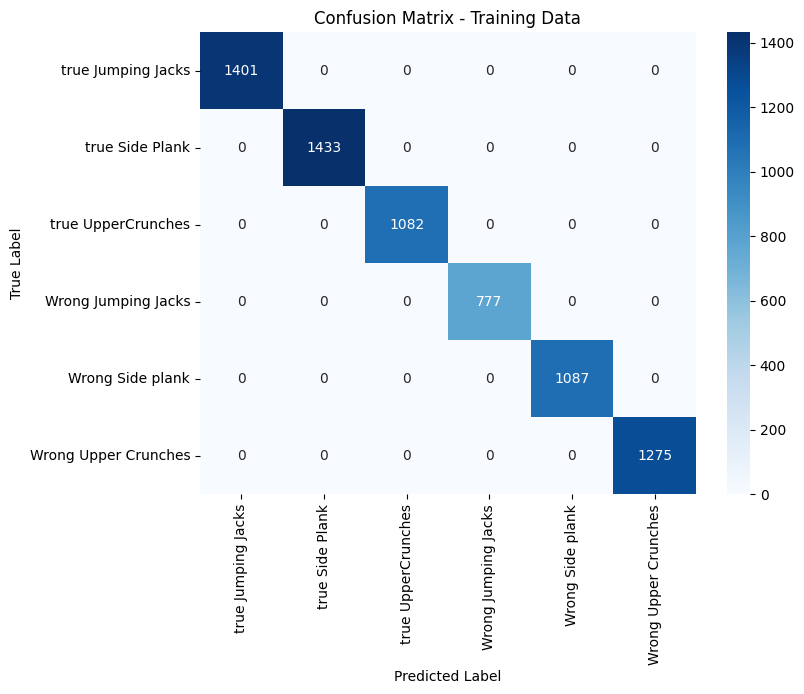

In [27]:
# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=exercise_Labels.keys(), yticklabels=exercise_Labels.keys())
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix_training.png')  
plt.show()

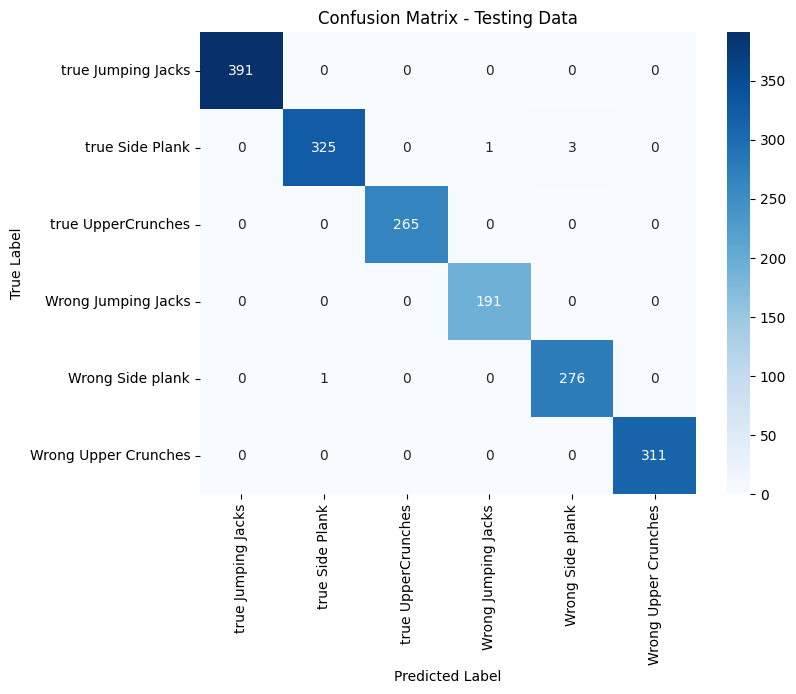

In [17]:
# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=exercise_Labels.keys(), yticklabels=exercise_Labels.keys())
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix_testing.png')  
plt.show()

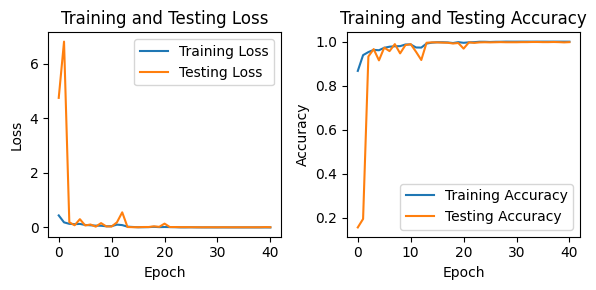

In [18]:
# Plot training and testing loss
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
# Save the plot
plt.savefig('training_testing_metrics.png')
plt.show()

In [19]:
# Save the trained model
model.save("exercise_classifier_model_v2.keras")
print("Model saved as exercise_classifier_model_v2.keras")

Model saved as exercise_classifier_model_v2.keras
